<a href="https://colab.research.google.com/github/dipanshuhaldar/binary_classification_pytorch/blob/master/titanic_approach_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
set working directory
look in the files in the working directory
'''
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [87]:
import os
path = '/content/drive/My Drive/titanic'
os.chdir(path)
os.listdir(path)

['gender_submission.csv', 'test.csv', 'train.csv', 'titanic_approach_1.ipynb']

In [0]:
#import libraries
import numpy as np #linear algebra
import pandas as pd #data processing, csv files I/O
import seaborn as sns#visualization

In [89]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
print(f'No of rows in train data: {train_data.shape[0]}')

No of rows in train data: 891


In [91]:
#get summary of the numerical columns of the training data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
#get more information about training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
#Get the number of missing values in each column for train set
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
#Get the number of missing values in each column for test set
test_data.isnull().sum()

PassengerId      0
Name             0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

**Lets explore the data parameter wise -**

*    PassengerId --> Not required

*    Survived - Survival (0 = No; 1 = Yes) --> Required

*    Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) --> Required

*    Name - Name --> Not required

*    Sex - Sex --> Required

*    Age - Age --> Required(will go for a Median based imputation based on salutation)

*    SibSp - Number of Siblings/Spouses Aboard --> Required

*   Parch - Number of Parents/Children Aboard --> Required

*    Ticket - Ticket Number --> Not required

*    Fare - Passenger Fare --> Required

*    Cabin - Cabin --> Not required(more than 80% data points missings can't be included)

*    Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) --> Required

**Basic EDA**

In [95]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

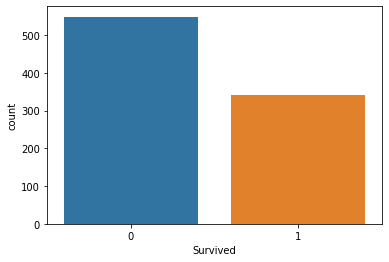

In [96]:
#Visualize the counts
sns.countplot(x='Survived', data = train_data)

In [97]:
pd.pivot_table(train_data, columns = 'Sex', index = 'Survived')

Age                  Fare  ...    Pclass     SibSp          
Sex          female       male     female  ...      male    female      male
Survived                                   ...                              
0         25.046875  31.618056  23.024385  ...  2.476496  1.209877  0.440171
1         28.847716  27.276022  51.938573  ...  2.018349  0.515021  0.385321

[2 rows x 12 columns]

In [98]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
print(f'No of rows in test data: {test_data.shape[0]}')

No of rows in test data: 418


In [100]:
#get summary of the numerical columns of the training data
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [101]:
#get more information about training data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Data Wrangling**

In [0]:
# impute missing Fare values using median of Pclass groups
class_fares = dict(train_data.groupby('Pclass')['Fare'].median())

# create a column of the average fares
train_data['fare_med'] = train_data['Pclass'].apply(lambda x: class_fares[x])

# replace all missing fares with the value in this column
train_data['Fare'].fillna(train_data['fare_med'], inplace=True, )
del train_data['fare_med']

In [0]:
# impute missing Fare values using median of Pclass groups
class_fares = dict(test_data.groupby('Pclass')['Fare'].median())

# create a column of the average fares
test_data['fare_med'] = test_data['Pclass'].apply(lambda x: class_fares[x])

# replace all missing fares with the value in this column
test_data['Fare'].fillna(test_data['fare_med'], inplace=True, )
del test_data['fare_med']

In [0]:
#one hot encoding of the features 'Sex', 'Embarked' and 'Pclass'
train_data = pd.get_dummies(train_data, columns = ['Sex', 'Embarked', 'Pclass'])
test_data = pd.get_dummies(test_data, columns = ['Sex', 'Embarked', 'Pclass'])

In [106]:
print(f'total missing Age value in training data is: {train_data.Age.isnull().sum()}\n')

total missing Age value in training data is: 177



In [107]:
train_data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


We carry will first carry on with simple [Median Imputation](https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34eb) the code for this is from [this](https://www.kaggle.com/jamesleslie/titanic-eda-wrangling-imputation/data) Kaggle kernel.

In [0]:
#create new Title column
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=True)
test_data['Title'] = test_data['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [109]:
#we will use the most common titles for replacement the uncommon ones
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Countess      1
Mme           1
Lady          1
Don           1
Jonkheer      1
Capt          1
Ms            1
Name: Title, dtype: int64

As we can see above, there are quite a few different titles. However, many of these titles are just French versions of the more common English titles, e.g. Mme = Madame = Mrs.

We will use the six most common titles, replacing all other titles with the most appropriate of these six.

In [0]:
#replace rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}

train_data.replace({'Title': mapping}, inplace=True)
test_data.replace({'Title': mapping}, inplace=True)

In [111]:
#test the titles left in the training data
train_data['Title'].value_counts()

Mr        525
Miss      185
Mrs       128
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

In [112]:
#test the titles left in the test data
test_data['Title'].value_counts()

Mr        242
Miss       79
Mrs        73
Master     21
Rev         2
Dr          1
Name: Title, dtype: int64

**Use median of title group**

Now, for each missing age value, we will impute the age using the median age for all people with the same title.

In [0]:
# impute missing Age values using median of Title groups for training data
title_ages = dict(train_data.groupby('Title')['Age'].median())

# create a column of the average ages
train_data['age_med'] = train_data['Title'].apply(lambda x: title_ages[x])

# replace all missing ages with the value in this column
train_data['Age'].fillna(train_data['age_med'], inplace=True, )
del train_data['age_med']

In [0]:
# impute missing Age values using median of Title groups for training data
title_ages = dict(test_data.groupby('Title')['Age'].median())

# create a column of the average ages
test_data['age_med'] = test_data['Title'].apply(lambda x: title_ages[x])

# replace all missing ages with the value in this column
test_data['Age'].fillna(test_data['age_med'], inplace=True, )
del test_data['age_med']

In [115]:
train_data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0,Mrs
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0,Mrs
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1,Mr


In [0]:
#drop unnecessary features
train_data.drop(['PassengerId','Name','Ticket', 'Cabin', 'Title'], axis = 1, inplace = True)
test_data.drop(['PassengerId','Name','Ticket', 'Cabin', 'Title'], axis = 1, inplace = True)

In [117]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


Treating **Age** and **Fare** before passing through the NN model

In [0]:
#categorize Age
data = [train_data, test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [119]:
#find the age distribution in the train set
train_data['Age'].value_counts()

4    245
6    149
2    128
5    120
3    106
0     72
1     71
Name: Age, dtype: int64

In [0]:
#categorize Fare
data = [train_data, test_data]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [122]:
#find the fare distribution in the train set
train_data['Fare'].value_counts()

2    229
0    223
1    217
3    169
4     44
5      9
Name: Fare, dtype: int64

In [123]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,2,1,0,0,0,1,0,0,1,0,0,1
1,1,5,1,0,3,1,0,1,0,0,1,0,0
2,1,3,0,0,1,1,0,0,0,1,0,0,1
3,1,5,1,0,3,1,0,0,0,1,1,0,0
4,0,5,0,0,1,0,1,0,0,1,0,0,1


Building a simple **Feed Forward Neural Network model** with **Pytorch** for survival prediction 